# <font color='#eb3483'> Uber Movement SANRAL Cape Town Challenge </font>
 
The objective of this challenge is to build a machine learning model that accurately predicts when and where the next road incident will occur in Cape Town

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading and inspect your data

In [7]:
df = pd.read_csv('data/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53845 entries, 0 to 53844
Data columns (total 9 columns):
EventId                       53845 non-null int64
Occurrence Local Date Time    53845 non-null object
Reporting Agency              52226 non-null object
Cause                         53845 non-null object
Subcause                      53845 non-null object
Status                        53845 non-null object
longitude                     53845 non-null object
latitude                      53845 non-null float64
road_segment_id               53845 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 3.7+ MB


,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,CAMERA,Accident,With A Fixed Object,Closed,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,Law Enforcement,Accident,Multi Vehicle,Closed,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,CAMERA,Stationary Vehicle,Vehicle On Shoulder,Closed,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,CAMERA,Accident,Multi Vehicle,Closed,18.8371319682,-34.087051,8LOVJZ3


In [8]:
df.apply('nunique')

EventId                       53845
Occurrence Local Date Time    50499
Reporting Agency                224
Cause                            24
Subcause                         58
Status                            4
longitude                     49132
latitude                      48947
road_segment_id                 549
dtype: int64

In [9]:
print(df.Cause.unique())
print(df.Subcause.unique())

['Stationary Vehicle' 'Accident' 'Police and Military' 'Congestion' 'Fire'
 'Routine Road Maintenance' 'Pedestrians' 'Obstruction' 'Lost Load'
 'Field Device Maintenance' 'HAZMAT' 'Poor Visibility' 'Road Construction'
 'Weather Conditions' 'Sporting Events' 'Cam' 'cdam' 'cam' 'Crash'
 'Concerts/Other' 'Arrestor' 'Roadworks' 'Fire & Smoke'
 'Weather & Road Conditions']
['Vehicle On Shoulder' 'With A Fixed Object' 'Multi Vehicle'
 'Single Vehicle' 'Road Rage' 'Light Delivery Vehicle' 'Any' 'Minibus'
 'Veld Fire' 'Heavy' 'Motor Car' 'Vehicles On Shoulder' 'Animal'
 'Protesting' 'Hijacking' 'Vehicle Fire' 'Road Block' 'Building Fire'
 'Bus' 'Bumper Bash' 'Other' 'With A Pedestrian' 'Overturned Vehicle'
 'Non-Flammable/Non-Toxic Gases' 'Jack Knife Truck'
 'Bomb Threat/Terrorist/Shooting' 'Motorcycle' 'Smoke' 'Vehicle On Fire'
 'Heavy Vehicle' 'Flooding' 'Debris' 'Substances Dangerous When Wet'
 'With An Animal' 'Dense Fog/Mist' 'Cash-In-Transit Heist' 'Flammable Gas'
 'Downed Cables' 'Accid

In [10]:
df.columns.unique()

Index(['EventId', 'Occurrence Local Date Time', 'Reporting Agency', 'Cause',
       'Subcause', 'Status', 'longitude', 'latitude', 'road_segment_id'],
      dtype='object')

In [11]:
# drop the columns we listed above that we dont want. 
df = df.drop(
    ['EventId','Reporting Agency','Status'], axis=1
)
df.head()

,Occurrence Local Date Time,Cause,Subcause,longitude,latitude,road_segment_id
0,01/01/16 00:53,Stationary Vehicle,Vehicle On Shoulder,18.5408955032,-33.888275,S0B3CGQ
1,01/01/16 00:54,Accident,With A Fixed Object,18.9307563219,-34.140857,RYJYAPI
2,01/01/16 02:26,Accident,Multi Vehicle,18.5533575029,-33.959154,U3KP57C
3,01/01/16 02:56,Stationary Vehicle,Vehicle On Shoulder,18.6775561589,-33.895258,RY0TRQ8
4,01/01/16 03:40,Accident,Multi Vehicle,18.8371319682,-34.087051,8LOVJZ3


### Removing duplicates

In [12]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]


(53845, 6)


In [13]:
df = df.drop_duplicates(keep='first')

print(df.shape)

(53839, 6)


In [14]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [15]:
df.describe()

,latitude
count,53839.000000
mean,-33.947963
std,0.511175
min,-34.153087
25%,-33.993633
50%,-33.950255
75%,-33.916789
max,18.839681


### 3. Missing Value

In [16]:
print(df.isnull().sum())

Occurrence Local Date Time    0
Cause                         0
Subcause                      0
longitude                     0
latitude                      0
road_segment_id               0
dtype: int64


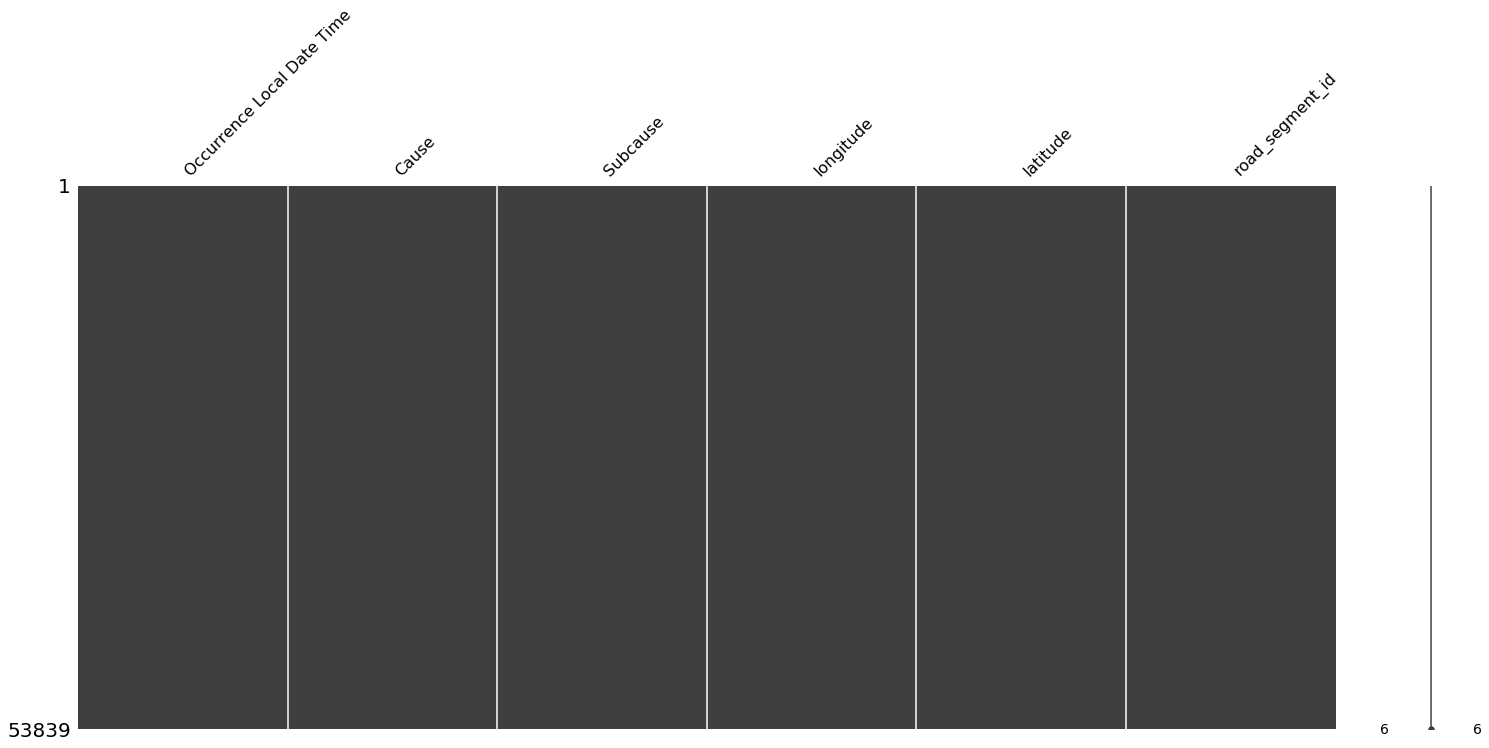

In [17]:
import missingno as msno
msno.matrix(df);

In [18]:
# define the Bounding Box
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
print(BBox)

('18.4247192601', 'Closed', -34.153086896, 18.8396805683)


In [19]:
conda install geopandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd

In [5]:
road = gpd.read_file("data/road_segments/road_segments.shp")
type(road)

geopandas.geodataframe.GeoDataFrame

In [6]:
road.head()

,ROADNO,CLASS,REGION,WIDTH,LANES,SURFTYPE,PAVETYPE,CONDITION,length_1,segment_id,geometry
0,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,D1U6OOF,"LINESTRING (18.65262 -33.97724, 18.65264 -33.9..."
1,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,NG4X2MD,"LINESTRING (18.65347 -33.97309, 18.65347 -33.9..."
2,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,792705Z,"LINESTRING (18.65431 -33.96894, 18.65432 -33.9..."
3,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,IK67XHB,"LINESTRING (18.65515 -33.96480, 18.65517 -33.9..."
4,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,OWCF2MH,"LINESTRING (18.65600 -33.96065, 18.65602 -33.9..."


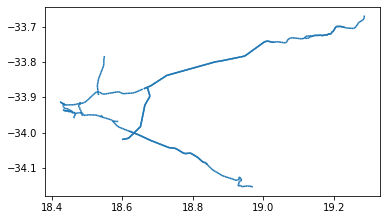

In [22]:
road.plot()

In [23]:
conda import shapefile


CommandNotFoundError: No command 'conda import'.


Note: you may need to restart the kernel to use updated packages.


In [24]:
sf = shapefile.Reader("data/road_segments/road_segments.dbf")

NameError: name 'shapefile' is not defined

In [38]:
# Train on 2017
train = df.loc[pd['Occurrence Local Date Time'] < '2018-01-01']
train = train.loc[train['Occurrence Local Date Time'] >= '2017-01-01']
# Test locally on the last part of 2018
local_test = df.loc[pd['Occurrence Local Date Time'] < '2019-01-01']
local_test = local_test.loc[local_test['Occurrence Local Date Time'] >= '2018-09-01']


TypeError: 'module' object is not subscriptable

In [39]:
#reshape 
sids = ['road_segment_id']

dts = pd.date_range('2017-01-01',
                    '2018-01-01',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    tr[str(sid)] = 0
    events = train.loc[train['road_segment_id'] == sid]
    dts = events['Occurrence Local Date Time'].dt.round('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1
tr.head()

NameError: name 'train' is not defined

### Saving data

In [70]:
df.to_csv("data/train_processed.csv", index=False)

###  Multiple group counts - injury data


In [80]:
inj = pd.read_csv('data/SANRAL_v3/Injuries2016_2018.csv')

In [81]:
inj.info()
inj.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16941 entries, 0 to 16940
Data columns (total 5 columns):
Network ID                 16941 non-null object
Event Id                   16941 non-null int64
Created Local Date Time    16941 non-null object
No Injuries                16941 non-null int64
Injury Type                16941 non-null object
dtypes: int64(2), object(3)
memory usage: 661.9+ KB


,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type
0,WC,60560,01/01/16 02:23,2,Light
1,WC,60565,01/01/16 07:05,4,Severe
2,WC,60569,01/01/16 08:43,1,Light
3,WC,60626,03/01/16 03:47,5,Light
4,WC,60631,03/01/16 08:40,2,Light


In [118]:
print(inj.shape)

# Rows containing duplicate data
duplicate_rows = inj[inj.duplicated()]


(16941, 5)


In [119]:
inj = inj.drop_duplicates(keep='first')

print(inj.shape)

(16941, 5)


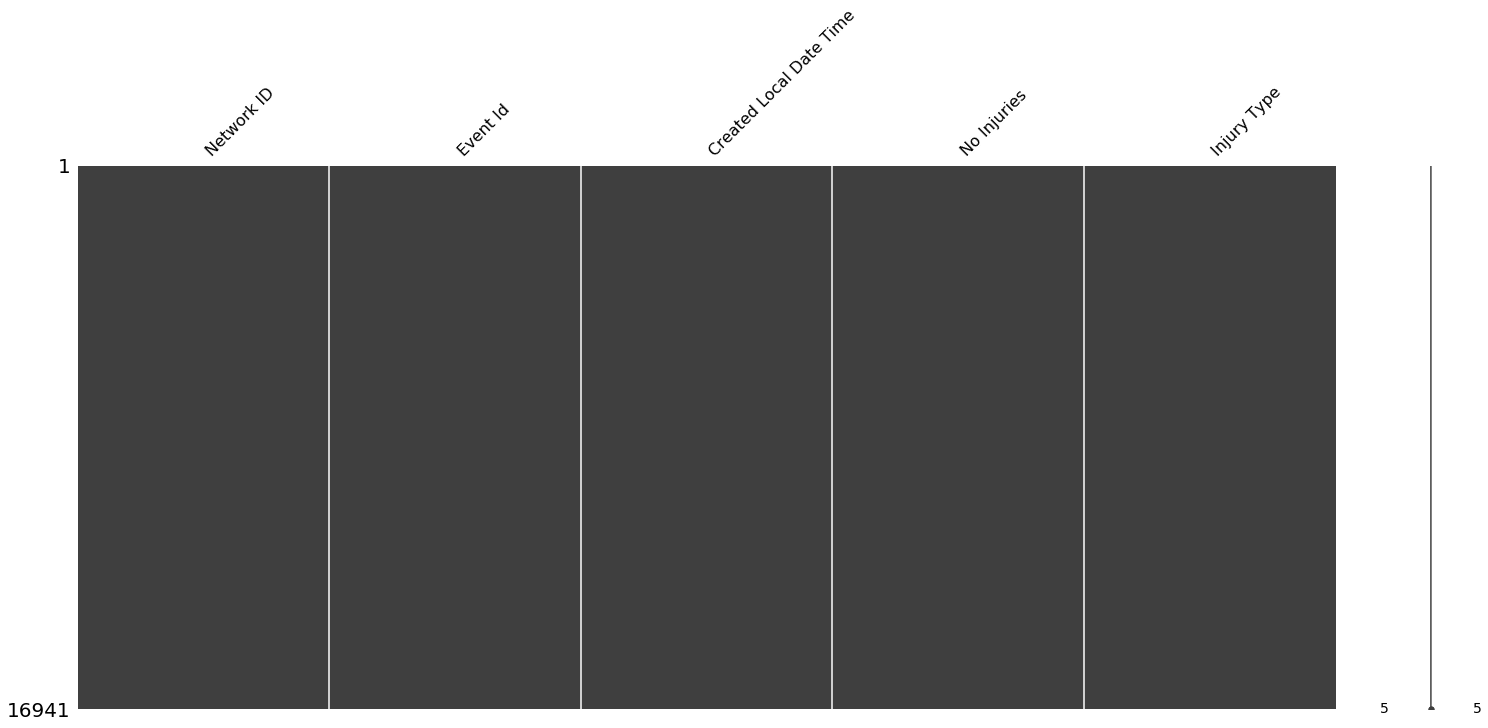

In [120]:
msno.matrix(inj);

### Create a injury and time correlation

In [40]:
def pivot_count(df, rows, columns): 
    df_pivot = df.pivot_table(
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot